# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

ValueError: x and y must be the same size

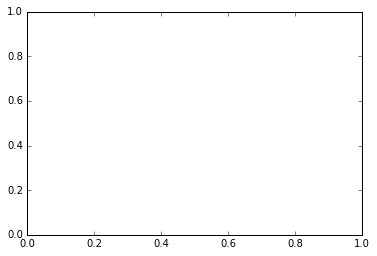

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [ ]:
print test_labels

In [ ]:
print predictions

In [ ]:
metrics.mean_absolute_error(test_labels, predictions)

In [ ]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

In [ ]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [ ]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

In [ ]:
coef

In [ ]:
linear_regressor.coef_

In [ ]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

In [ ]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1])

#### Lasso

In [ ]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [ ]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

In [ ]:
print lasso_regressor.coef_

In [ ]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

In [ ]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])